In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [53]:
# Load the data
data = pd.read_csv("Mush.csv")
data

,Year,Harvested Area('000 sq ft),Harvested Area(acres),Production,Production(tonnes),Value($ '000),Average Price (cents/lb),Average Price ($/tonne)
0,2021,36039,827,156780,71114.30,417415,266.24,5869.64
1,2020,33430,767,147240,66787.02,369977,251.27,5539.65
2,2019,34033,781,147020,66687.23,339329,230.80,5088.37
3,2018,31965,734,152550,69195.60,338350,221.80,4889.76
4,2017,29199,670,139118,63102.94,311346,223.80,4933.94
5,2016,28907,664,134664,61082.64,287959,213.84,4714.25
6,2015,27613,634,128662,58360.17,257466,200.11,4411.67
7,2014,32789,753,142078,64445.57,267284,188.12,4147.44
8,2013,33865,777,149312,67726.86,278069,186.23,4105.74
9,2012,32294,741,152600,69218.28,268625,176.03,3880.84


In [138]:
#clean dataset
df = data.drop(["Harvested Area('000 sq ft)", "Average Price ($/tonne)","Harvested Area(acres)","Production","Value($ '000)","Average Price (cents/lb)"], axis=1)
df = df.fillna(0)

df['Year'] = df['Year'].astype('int')
df['Production(tonnes)'] = df['Production(tonnes)'].astype('int')


In [139]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                39 non-null     int32
 1   Production(tonnes)  39 non-null     int32
dtypes: int32(2)
memory usage: 440.0 bytes


In [140]:
# Create the linear regression model
model = LinearRegression()

In [141]:
# Reshape the data

# Reshape the input arrays
X = df["Year"].values.reshape(-1, 1)
y = df["Production(tonnes)"].values.reshape(-1, 1)

In [142]:
# Fit the model to the data
model.fit(X,y)

LinearRegression()

In [156]:
# Make predictions 
new_data = pd.DataFrame({'Year': [2025, 2026, 2027,2012,2001,2015, 1999,2003]})  # New data for prediction

prediction = model.predict(new_data)
# Print the predictions
print('Predicted Production per Ton: ')
print(prediction)

Predicted Production per Ton: 
[[78526.94163293]
 [79949.94466937]
 [81372.9477058 ]
 [60027.90215924]
 [44374.86875843]
 [64296.91126856]
 [41528.86268556]
 [47220.87483131]]


C:\Users\Dex\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Predicted Production per Ton: 
[[78526.94163293]
 [79949.94466937]
 [81372.9477058 ]
 [60027.90215924]
 [44374.86875843]
 [64296.91126856]
 [41528.86268556]
 [47220.87483131]]


In [154]:
y_pred =model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)


R2 Score: 
0.9332023317765872
MS Error: 
18359442.213164367


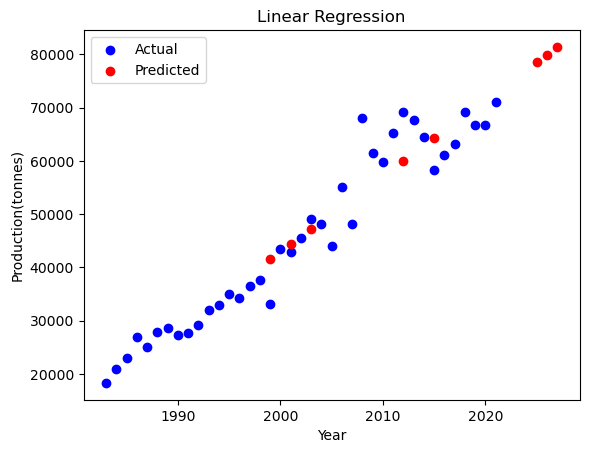

R2 Score: 
0.9332023317765872
MS Error: 
18359442.213164367


In [155]:
# Plot the actual values and the predicted values
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(new_data, prediction, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Production(tonnes)')
plt.title('Linear Regression')
plt.legend()
plt.show()
print('R2 Score: ')
print(r2)
print('MS Error: ')
print(mse)